# 6.4 Machine Learning - Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data wrangling and cleaning
#### 3. Hypothesis #1
    3.1 Data prep for regression analysis
    3.2 Regression analysis
#### 4. Hypothesis #2
    4.1 Data prep for regression analysis
    4.2 Regression analysis
#### 5. Hypothesis #3
     5.1 Data prep for regression analysis
     5.2 Regression analysis
#### 6. Hypothesis #4
     6.1 Data prep for regression analysis
     6.2 Regression analysis

## 1. Importing libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# create a path

path = r'C:\Users\apiny\Documents\CareerFoundry\Data Immersion\6_Advanced Analytics\EU_agriculture'

In [4]:
# import a dataframe

df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'agri_area_pop_cleaned.csv'))

In [5]:
df.shape

(46521, 36)

## 2. Data wrangling and cleaning
##### Select specific data to analyze : Fruits (Commodity: ORANGES, APPLES, PEACHES AND NECTARINES,  TOMATOES)

In [17]:
# import a dataset of 'fruits' ('ORANGES','APPLES','PEACHES AND NECTARINES','TOMATOES')

df_fruits = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'fruits.csv'))

In [18]:
df_fruits

,Unnamed: 0,Country,Commodity,Commodity (Type),Year,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),Total Exports (THOUSAND TONS),Total Imports (THOUSAND TONS),Area (SQ.KM.),Total Population (THOUSAND PEOPLE)
0,42,Austria,APPLES,APPLES,2002,178.376510,333.336580,111.547750,334.581058,511.713090,446.128808,83871,8059.591
1,43,Austria,APPLES,APPLES,2003,167.950690,332.013030,233.492730,432.443956,499.963720,665.936686,83871,8098.393
2,44,Austria,APPLES,APPLES,2004,198.581070,484.538310,295.998110,522.028293,683.119380,818.026403,83871,8141.815
3,45,Austria,APPLES,APPLES,2005,186.422310,529.740660,295.474860,426.405099,716.162970,721.879959,83871,8200.618
4,46,Austria,APPLES,APPLES,2006,184.106940,403.716040,292.268990,433.617336,587.822980,725.886326,83871,8253.451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,45932,Sweden,TOMATOES,TOMATOES,2019,8.393544,17.441394,18.855582,344.769853,25.834938,363.625435,450295,10214.429
2264,45933,Sweden,TOMATOES,TOMATOES,2020,8.485296,17.238550,22.098080,355.088653,25.723846,377.186733,450295,10321.414
2265,45934,Sweden,TOMATOES,TOMATOES,2021,8.185620,18.955151,21.136356,335.769082,27.140771,356.905438,450295,10416.525
2266,45935,Sweden,TOMATOES,TOMATOES,2022,8.298214,19.649557,17.355089,353.319903,27.947771,370.674992,450295,10517.669


In [19]:
# select only related columns

df_fruits = df_fruits[['Country',
                       'Commodity',
                       'Exports (Extra-EU) (THOUSAND TONS)',
                       'Exports (Intra-EU) (THOUSAND TONS)',
                       'Imports (Extra-EU) (THOUSAND TONS)',
                       'Imports (Intra-EU) (THOUSAND TONS)',
                       'Total Exports (THOUSAND TONS)',
                       'Total Imports (THOUSAND TONS)',
                       'Area (SQ.KM.)',
                       'Total Population (THOUSAND PEOPLE)']]

In [20]:
df_fruits.head()

,Country,Commodity,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),Total Exports (THOUSAND TONS),Total Imports (THOUSAND TONS),Area (SQ.KM.),Total Population (THOUSAND PEOPLE)
0,Austria,APPLES,178.37651,333.33658,111.54775,334.581058,511.71309,446.128808,83871,8059.591
1,Austria,APPLES,167.95069,332.01303,233.49273,432.443956,499.96372,665.936686,83871,8098.393
2,Austria,APPLES,198.58107,484.53831,295.99811,522.028293,683.11938,818.026403,83871,8141.815
3,Austria,APPLES,186.42231,529.74066,295.47486,426.405099,716.16297,721.879959,83871,8200.618
4,Austria,APPLES,184.10694,403.71604,292.26899,433.617336,587.82298,725.886326,83871,8253.451


In [21]:
df_fruits.shape

(2268, 10)

##### Missing values check

In [22]:
df_fruits.isnull().sum()

Country                               0
Commodity                             0
Exports (Extra-EU) (THOUSAND TONS)    0
Exports (Intra-EU) (THOUSAND TONS)    0
Imports (Extra-EU) (THOUSAND TONS)    0
Imports (Intra-EU) (THOUSAND TONS)    0
Total Exports (THOUSAND TONS)         0
Total Imports (THOUSAND TONS)         0
Area (SQ.KM.)                         0
Total Population (THOUSAND PEOPLE)    0
dtype: int64

##### Duplicates check

In [23]:
df_fruits_dups = df_fruits.duplicated()

In [24]:
df_fruits_dups.shape

# No duplicates

(2268,)

##### Extreme values check

C:\Users\apiny\AppData\Local\Temp\ipykernel_19012\2656084319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fruits['Total Exports (THOUSAND TONS)'], bins=25)


<Axes: xlabel='Total Exports (THOUSAND TONS)', ylabel='Density'>

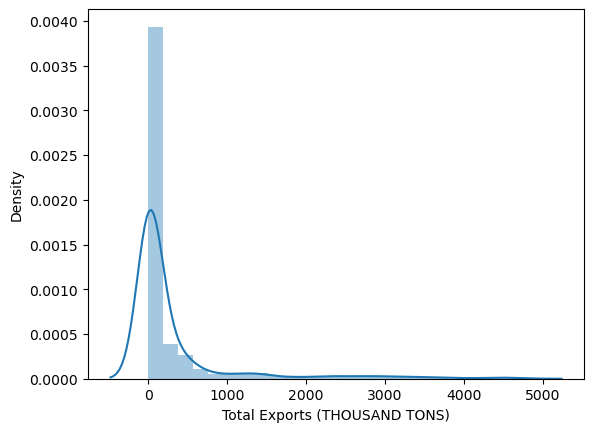

In [25]:
sns.distplot(df_fruits['Total Exports (THOUSAND TONS)'], bins=25)

C:\Users\apiny\AppData\Local\Temp\ipykernel_19012\4219853869.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fruits['Total Imports (THOUSAND TONS)'], bins=25)


<Axes: xlabel='Total Imports (THOUSAND TONS)', ylabel='Density'>

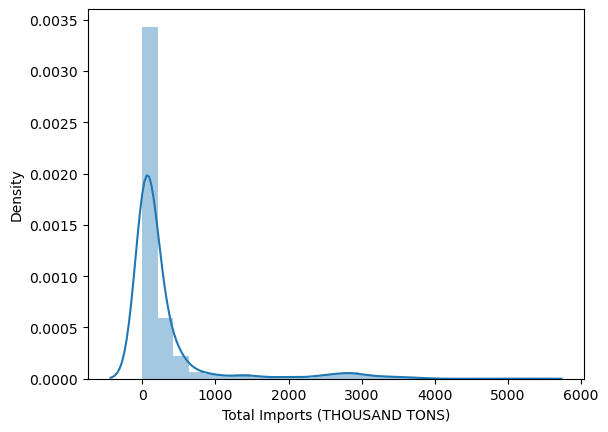

In [26]:
sns.distplot(df_fruits['Total Imports (THOUSAND TONS)'], bins=25)

In [27]:
df_fruits[['Total Exports (THOUSAND TONS)','Total Imports (THOUSAND TONS)']].describe()

,Total Exports (THOUSAND TONS),Total Imports (THOUSAND TONS)
count,2268.000000,2268.000000
mean,307.691462,316.298241
std,746.123816,677.669362
min,0.000000,0.750000
25%,2.911563,24.894888
50%,21.864072,80.001627
75%,190.852452,239.376746
max,4762.340383,5297.574966


##### Select specific data to analyze : TOMATOES

In [28]:
# create a subset of 'TOMATOES'

df_tomatoes = df.loc[df['Commodity'].isin(['TOMATOES'])]

In [29]:
df_tomatoes.head()

,Unnamed: 0,Country,Commodity,Commodity (Type),Year,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Exports (Extra-EU) (THOUSAND HECTOLITRES),Exports (Intra-EU) (THOUSAND HECTOLITRES),Imports (Extra-EU) (THOUSAND TONS),...,Total Population (THOUSAND PEOPLE),Total Exports (THOUSAND TONS),Total Imports (THOUSAND TONS),Total Exports (THOUSAND HECTOLITRES),Total Imports (THOUSAND HECTOLITRES),Total live exports (THOUSAND TONS (CARCASS WEIGHT EQ.)),Total live imports (THOUSAND TONS (CARCASS WEIGHT EQ.)),Total Meat exports (THOUSAND TONS (CARCASS WEIGHT EQ.)),Total Meat Exports (THOUSAND TONS (CARCASS WEIGHT EQ.)),Total Meat imports (THOUSAND TONS (CARCASS WEIGHT EQ.))
1117,1117,Austria,TOMATOES,TOMATOES,2002,3.227088,13.033619,NaN,NaN,17.572010,...,8059.591,16.260707,163.778258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118,1118,Austria,TOMATOES,TOMATOES,2003,3.610107,19.905530,NaN,NaN,21.626479,...,8098.393,23.515637,188.882395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,1119,Austria,TOMATOES,TOMATOES,2004,2.773789,18.605083,NaN,NaN,26.475557,...,8141.815,21.378872,207.228834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,1120,Austria,TOMATOES,TOMATOES,2005,2.853383,22.794955,NaN,NaN,34.299829,...,8200.618,25.648338,201.805018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1121,1121,Austria,TOMATOES,TOMATOES,2006,2.403822,22.471847,NaN,NaN,17.946673,...,8253.451,24.875669,196.487477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# select only related columns

df_tomatoes = df_tomatoes[['Country',
                           'Year',
                           'Exports (Extra-EU) (THOUSAND TONS)',
                           'Exports (Intra-EU) (THOUSAND TONS)',
                           'Imports (Extra-EU) (THOUSAND TONS)',
                           'Imports (Intra-EU) (THOUSAND TONS)',
                           'Area (SQ.KM.)',
                           'Total Population (THOUSAND PEOPLE)']]

In [31]:
df_tomatoes.shape

(567, 8)

In [32]:
# aggregate total exports into a new column

df_tomatoes['Total Exports (THOUSAND TONS)'] = df_tomatoes['Exports (Extra-EU) (THOUSAND TONS)'] + df_tomatoes['Exports (Intra-EU) (THOUSAND TONS)']

In [33]:
# aggregate total imports into a new column

df_tomatoes['Total Imports (THOUSAND TONS)'] = df_tomatoes['Imports (Extra-EU) (THOUSAND TONS)'] + df_tomatoes['Imports (Intra-EU) (THOUSAND TONS)']

In [34]:
df_tomatoes.shape

(567, 10)

In [35]:
df_tomatoes.head()

,Country,Year,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),Area (SQ.KM.),Total Population (THOUSAND PEOPLE),Total Exports (THOUSAND TONS),Total Imports (THOUSAND TONS)
1117,Austria,2002,3.227088,13.033619,17.572010,146.206248,83871,8059.591,16.260707,163.778258
1118,Austria,2003,3.610107,19.905530,21.626479,167.255916,83871,8098.393,23.515637,188.882395
1119,Austria,2004,2.773789,18.605083,26.475557,180.753277,83871,8141.815,21.378872,207.228834
1120,Austria,2005,2.853383,22.794955,34.299829,167.505189,83871,8200.618,25.648338,201.805018
1121,Austria,2006,2.403822,22.471847,17.946673,178.540804,83871,8253.451,24.875669,196.487477


##### Missing values check

In [36]:
df_tomatoes.isnull().sum()

Country                               0
Year                                  0
Exports (Extra-EU) (THOUSAND TONS)    0
Exports (Intra-EU) (THOUSAND TONS)    0
Imports (Extra-EU) (THOUSAND TONS)    0
Imports (Intra-EU) (THOUSAND TONS)    0
Area (SQ.KM.)                         0
Total Population (THOUSAND PEOPLE)    0
Total Exports (THOUSAND TONS)         0
Total Imports (THOUSAND TONS)         0
dtype: int64

##### Duplicates check

In [37]:
df_tomatoes_dups = df_tomatoes.duplicated()

In [38]:
df_tomatoes_dups.shape

# No duplicates

(567,)

##### Extreme values check

C:\Users\apiny\AppData\Local\Temp\ipykernel_19012\3222324184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tomatoes['Total Exports (THOUSAND TONS)'], bins=25)


<Axes: xlabel='Total Exports (THOUSAND TONS)', ylabel='Density'>

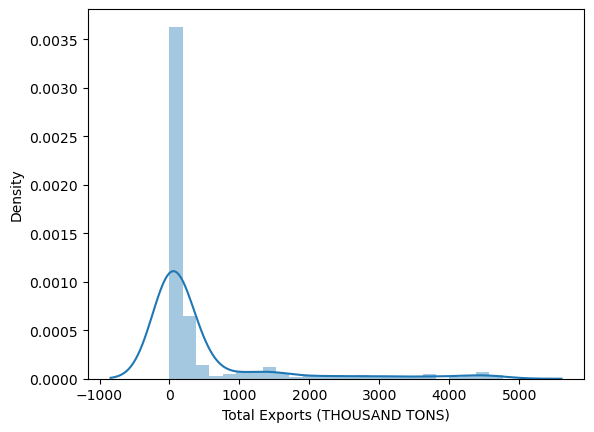

In [39]:
sns.distplot(df_tomatoes['Total Exports (THOUSAND TONS)'], bins=25)

C:\Users\apiny\AppData\Local\Temp\ipykernel_19012\3168563284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tomatoes['Total Imports (THOUSAND TONS)'], bins=25)


<Axes: xlabel='Total Imports (THOUSAND TONS)', ylabel='Density'>

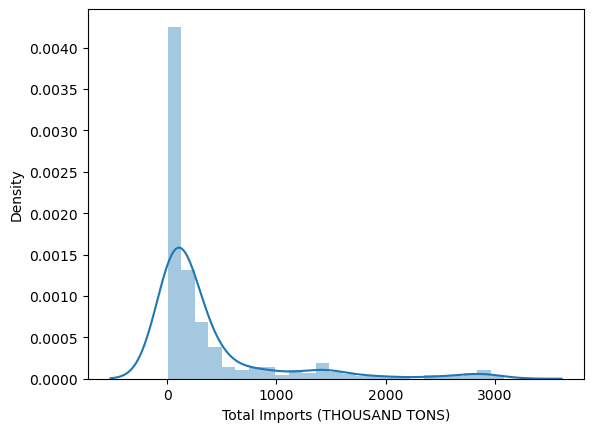

In [40]:
sns.distplot(df_tomatoes['Total Imports (THOUSAND TONS)'], bins=25)

In [41]:
df_tomatoes[['Total Exports (THOUSAND TONS)','Total Imports (THOUSAND TONS)']].describe()

,Total Exports (THOUSAND TONS),Total Imports (THOUSAND TONS)
count,567.000000,567.000000
mean,441.745492,376.563839
std,997.664076,619.498228
min,0.042225,5.475145
25%,4.625848,60.666888
50%,24.342198,117.186801
75%,275.417547,327.223431
max,4762.340383,3085.349045


In [42]:
# export a data set 

df_tomatoes.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'tomatoes.csv'))

## 3. Hypothesis #1

    "If countries have a high quantity of fruit imports, then they have a low quantity of fruit exports."

### 3.1 Data prep for regression analysis  for the hypothesis #1

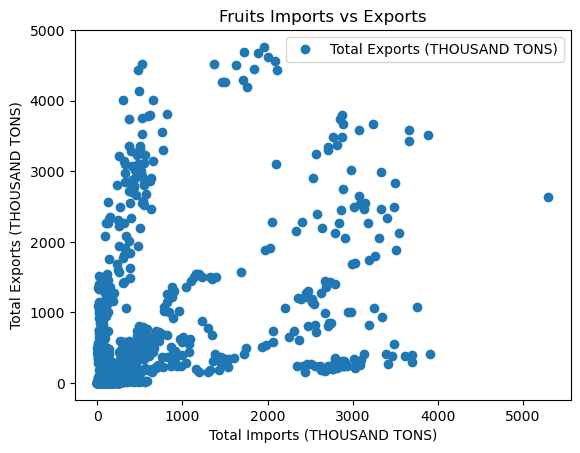

In [43]:
# create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df_fruits.plot(x = 'Total Imports (THOUSAND TONS)', y='Total Exports (THOUSAND TONS)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Fruits Imports vs Exports')  
plt.xlabel('Total Imports (THOUSAND TONS)')  
plt.ylabel('Total Exports (THOUSAND TONS)')  
plt.show()

In [44]:
# reshape the variables into NumPy arrays and put them into separate objects

X = df_fruits['Total Imports (THOUSAND TONS)'].values.reshape(-1,1)
y = df_fruits['Total Exports (THOUSAND TONS)'].values.reshape(-1,1)

In [45]:
X

array([[446.128808],
       [665.936686],
       [818.026403],
       ...,
       [356.905438],
       [370.674992],
       [299.074538]])

In [46]:
y

array([[511.71309   ],
       [499.96372   ],
       [683.11938   ],
       ...,
       [ 27.140771  ],
       [ 27.947771  ],
       [ 31.68208033]])

In [47]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3.2 Regression analysis for the hypothesis #1

In [48]:
# create a regression object

regression = LinearRegression()

In [49]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [50]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

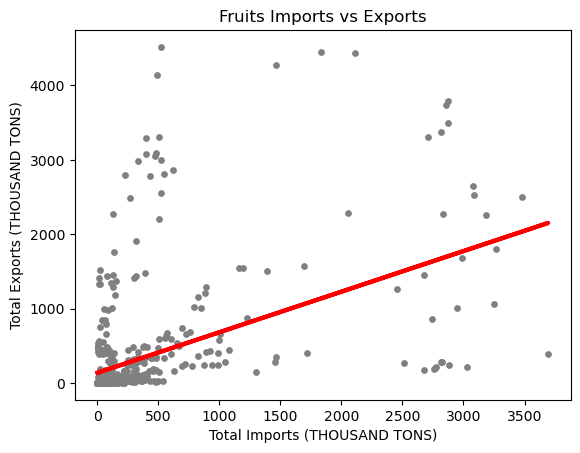

In [51]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Fruits Imports vs Exports')
plt.xlabel('Total Imports (THOUSAND TONS)')
plt.ylabel('Total Exports (THOUSAND TONS)')
plt.show()

In [52]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [53]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.54578964]]
Mean squared error:  366703.7177110548
R2 score:  0.27164072234073455


There is a positive relationship at a degree of 0.5458, indicating that countries with a higher quantity of fruit imports tend to have a high quantity of fruit exports as well.

However, the root mean squared error (MSE) of 366,703 is quite large, which may imply that regression may not be the best model.

Moreover, the R-squared value is 0.2716, or 27%, considered a relatively low value, this means that the model isn't a great fit either.

In [54]:
y_predicted

array([[ 136.93364842],
       [ 147.81557163],
       [ 136.30316041],
       [1059.96902571],
       [ 172.65834402],
       [ 166.89205413],
       [ 140.9263665 ],
       [ 273.50331174],
       [ 138.78699993],
       [ 139.99279005],
       [ 285.0646137 ],
       [ 179.56956521],
       [ 170.22943659],
       [ 147.08918075],
       [1473.49265553],
       [ 198.78923671],
       [ 173.95070238],
       [ 210.84388775],
       [ 139.77740727],
       [ 301.67664532],
       [ 272.5051531 ],
       [ 142.90326569],
       [ 174.30172589],
       [ 139.16361825],
       [ 291.49280451],
       [1702.60270175],
       [ 170.573766  ],
       [ 284.31581543],
       [ 148.73807564],
       [ 189.5067282 ],
       [ 219.13747783],
       [ 163.45248129],
       [ 337.83968149],
       [ 136.93797216],
       [ 532.53201799],
       [ 380.6922926 ],
       [ 418.96639343],
       [ 260.09928807],
       [ 376.00324955],
       [ 199.90109589],
       [ 147.75927998],
       [ 170.034

In [55]:
# create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.021716,136.933648
1,0.835971,147.815572
2,0.035300,136.303160
3,1577.954048,1059.969026
4,794.703956,172.658344
5,6.255808,166.892054
6,0.006230,140.926367
7,303.135010,273.503312
8,0.208600,138.787000
9,0.082627,139.992790


## 4. Hypothesis #2

    "If countries have a high quantity of fruit exports to destinations outside the EU, then they also have a high quantity of fruit exports within the EU."

### 4.1 Data prep for regression analysis for the hypothesis #2

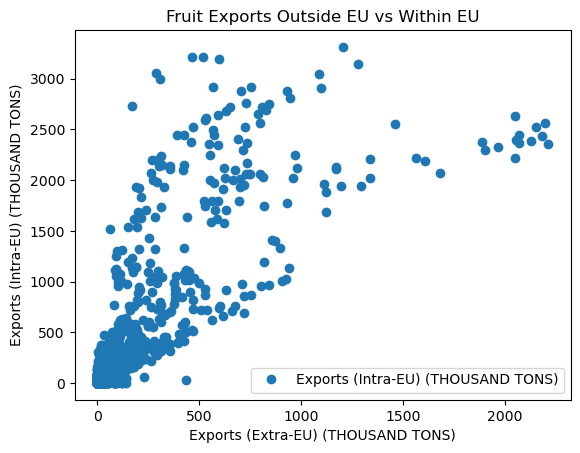

In [56]:
# create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df_fruits.plot(x = 'Exports (Extra-EU) (THOUSAND TONS)', y='Exports (Intra-EU) (THOUSAND TONS)',style='o')
plt.title('Fruit Exports Outside EU vs Within EU')  
plt.xlabel('Exports (Extra-EU) (THOUSAND TONS)')  
plt.ylabel('Exports (Intra-EU) (THOUSAND TONS)')  
plt.show()

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_fruits['Exports (Extra-EU) (THOUSAND TONS)'].values.reshape(-1,1)
y = df_fruits['Exports (Intra-EU) (THOUSAND TONS)'].values.reshape(-1,1)

In [58]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4.2 Regression analysis for hypothesis #2

In [59]:
# create a regression object

regression = LinearRegression()

In [60]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [61]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

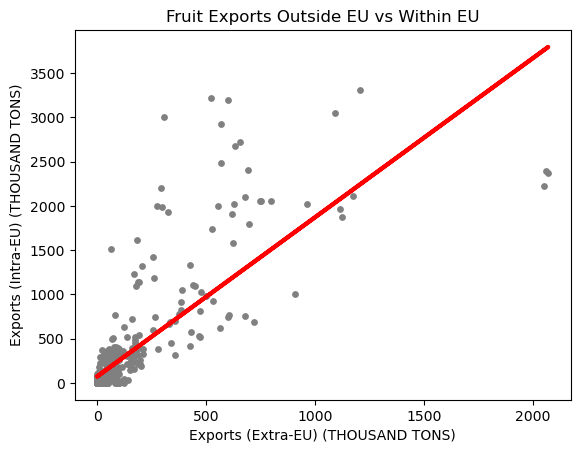

In [62]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Fruit Exports Outside EU vs Within EU')
plt.xlabel('Exports (Extra-EU) (THOUSAND TONS)')
plt.ylabel('Exports (Intra-EU) (THOUSAND TONS)')
plt.show()

In [63]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [64]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.79959364]]
Mean squared error:  92719.88210090356
R2 score:  0.6601396921378115


There is a positive relationship at a degree of 1.7996, indicating that countries that export to destinations outside the EU also have a high quantity of fruit exports within the EU.

However, the root mean squared error (MSE) of 92720 is quite large, which may imply that regression may not be the best model.

While the R-squared value is 0.6601, or 66%, considered relatively good, this suggests that the model may be a good fit.

In [65]:
y_predicted

array([[  74.34101181],
       [  74.34420069],
       [  74.34065189],
       [ 186.15578249],
       [ 684.71324292],
       [  80.54332388],
       [  74.34709623],
       [  97.28959187],
       [  74.71604712],
       [  74.48746454],
       [  89.77530944],
       [ 413.52320403],
       [  75.76235066],
       [  74.34111978],
       [ 391.00516535],
       [  90.06800075],
       [  74.56442956],
       [  83.62925446],
       [  79.48568831],
       [ 119.43324428],
       [ 169.55596364],
       [  74.34225893],
       [  74.41637519],
       [  74.34186122],
       [  81.70278587],
       [1149.34848381],
       [  74.43511976],
       [ 142.78239949],
       [  74.68636462],
       [  93.06402003],
       [  85.54006839],
       [  83.12115539],
       [ 256.94258596],
       [  74.34073467],
       [ 387.72925047],
       [ 123.32370119],
       [2098.37444748],
       [  97.19050624],
       [ 163.14583629],
       [ 297.6755134 ],
       [  74.3769011 ],
       [  94.801

In [66]:
# create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.021516,74.341012
1,0.833999,74.344201
2,0.035300,74.340652
3,1515.820504,186.155782
4,455.531502,684.713243
5,2.809101,80.543324
6,0.002649,74.347096
7,290.382720,97.289592
8,0.000000,74.716047
9,0.001046,74.487465


## 5. Hypothesis #3

    "If countries have a low quantity of tomato exports, then they tend to have a high quantity of tomato imports."

### 5.1 Data prep for regression analysis for the hypothesis #3

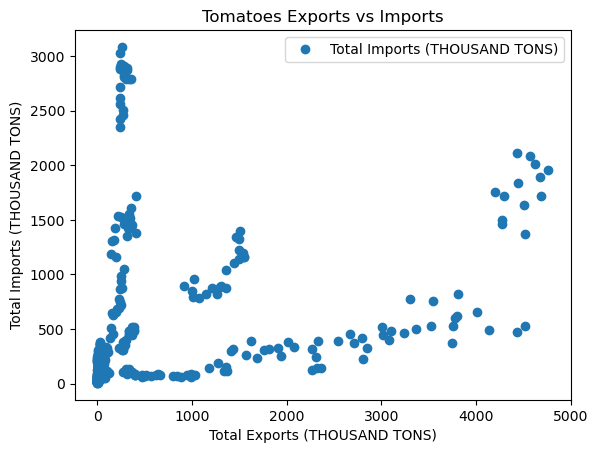

In [67]:
# create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df_tomatoes.plot(x = 'Total Exports (THOUSAND TONS)', y='Total Imports (THOUSAND TONS)',style='o')
plt.title('Tomatoes Exports vs Imports')  
plt.xlabel('Total Exports (THOUSAND TONS)')  
plt.ylabel('Total Imports (THOUSAND TONS)')  
plt.show()

In [68]:
# reshape the variables into NumPy arrays and put them into separate objects

X = df_tomatoes['Total Exports (THOUSAND TONS)'].values.reshape(-1,1)
y = df_tomatoes['Total Imports (THOUSAND TONS)'].values.reshape(-1,1)

In [69]:
X

array([[1.62607070e+01],
       [2.35156370e+01],
       [2.13788720e+01],
       [2.56483380e+01],
       [2.48756690e+01],
       [2.63879770e+01],
       [2.78556680e+01],
       [2.95624450e+01],
       [3.99225270e+01],
       [3.71403090e+01],
       [3.33112560e+01],
       [3.34056560e+01],
       [3.16056920e+01],
       [2.74668760e+01],
       [3.19870430e+01],
       [4.22802170e+01],
       [4.53734980e+01],
       [5.66451050e+01],
       [7.59630050e+01],
       [1.01166443e+02],
       [9.45091750e+01],
       [2.30131870e+02],
       [2.57278717e+02],
       [2.64005517e+02],
       [2.67029748e+02],
       [2.68297360e+02],
       [2.90353554e+02],
       [2.72298196e+02],
       [2.77224490e+02],
       [2.97303264e+02],
       [3.04892513e+02],
       [3.35207741e+02],
       [3.44689764e+02],
       [3.65054021e+02],
       [3.52022939e+02],
       [3.30048394e+02],
       [3.33923690e+02],
       [3.30626206e+02],
       [3.64884359e+02],
       [3.88995071e+02],


In [70]:
y

array([[ 163.778258],
       [ 188.882395],
       [ 207.228834],
       [ 201.805018],
       [ 196.487477],
       [ 210.768875],
       [ 202.316182],
       [ 207.95387 ],
       [ 223.215585],
       [ 226.065013],
       [ 237.995375],
       [ 225.70952 ],
       [ 243.56172 ],
       [ 232.693978],
       [ 249.707878],
       [ 243.392318],
       [ 253.149457],
       [ 272.908855],
       [ 308.441411],
       [ 329.163346],
       [ 330.815746],
       [ 321.290747],
       [ 324.601725],
       [ 304.68718 ],
       [ 316.253447],
       [ 310.51791 ],
       [ 351.352126],
       [ 381.371277],
       [ 367.752787],
       [ 391.54796 ],
       [ 400.242889],
       [ 440.86896 ],
       [ 452.329554],
       [ 517.170725],
       [ 467.168302],
       [ 479.680842],
       [ 484.587717],
       [ 449.460261],
       [ 448.537598],
       [ 484.485201],
       [ 486.082561],
       [ 520.428968],
       [  21.283619],
       [  20.897524],
       [  14.927637],
       [  

In [71]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5.2 Regression analysis for the hypothesis #3

In [72]:
# create a regression object

regression = LinearRegression()

In [73]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [74]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

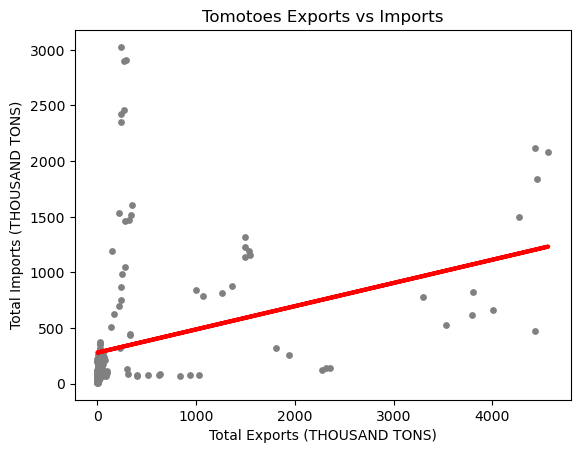

In [75]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Tomotoes Exports vs Imports')
plt.xlabel('Total Exports (THOUSAND TONS)')
plt.ylabel('Total Imports (THOUSAND TONS)')
plt.show()

In [76]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [77]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20866578]]
Mean squared error:  323763.08109418885
R2 score:  0.15086477623269712


There is a positive relationship at a degree of 0.2087, indicating that countries with a higher quantity of tomatoes exports tend to have a high quantity of tomatoes imports as well.

However, the root mean squared error (MSE) of 323,763 is quite large, which may imply that regression may not be the best model.

Moreover, the R-squared value is 0.1509, or 15%, considered a relatively low value, this means that the model isn't a great fit either.

## 6. Hypothesis #4

    "If countries have a low quantity of tomato imports within the EU, then they generally have a high quantity of tomato imports from outside the EU."

### 6.1 Data prep for regression analysis for the hypothesis #4

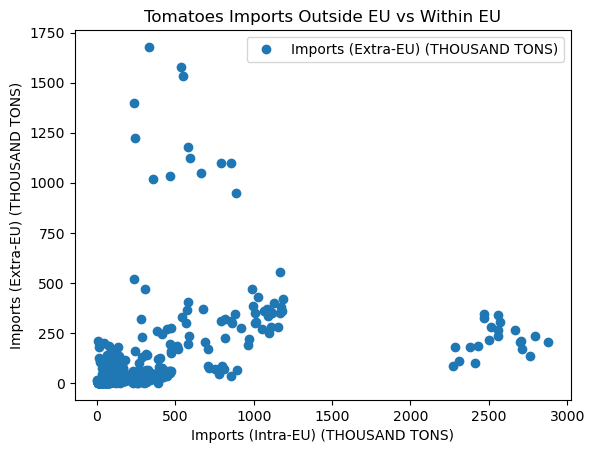

In [78]:
# create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df_tomatoes.plot(x = 'Imports (Intra-EU) (THOUSAND TONS)', y='Imports (Extra-EU) (THOUSAND TONS)',style='o')
plt.title('Tomatoes Imports Outside EU vs Within EU')  
plt.xlabel('Imports (Intra-EU) (THOUSAND TONS)')  
plt.ylabel('Imports (Extra-EU) (THOUSAND TONS)')  
plt.show()

In [79]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_tomatoes['Imports (Extra-EU) (THOUSAND TONS)'].values.reshape(-1,1)
y = df_tomatoes['Imports (Intra-EU) (THOUSAND TONS)'].values.reshape(-1,1)

In [80]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6.2 Regression analysis for the hypothesis #4

In [81]:
# create a regression object

regression = LinearRegression()

In [82]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [83]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

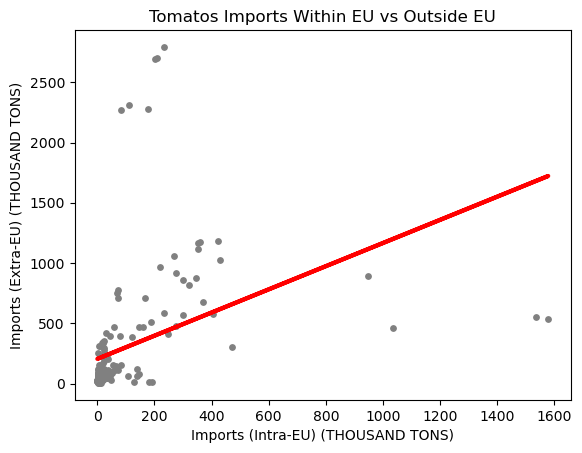

In [84]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Tomatos Imports Within EU vs Outside EU')
plt.xlabel('Imports (Intra-EU) (THOUSAND TONS)')
plt.ylabel('Imports (Extra-EU) (THOUSAND TONS)')
plt.show()

In [85]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [86]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.96179576]]
Mean squared error:  224691.34267870037
R2 score:  0.12610441801441552


There is a positive relationship at a degree of 0.9618, indicating that countries with a higher quantity of tomatoes imports within the EU tend to have a high quantity of tomatoes imports from outside the EU as well.

However, the root mean squared error (MSE) of 224,691 is quite large, which may imply that regression may not be the best model.

Moreover, the R-squared value is 0.1261, or 13%, considered a relatively low value, this means that the model isn't a great fit either.